In [1]:
#Importando as bibliotecas responsáveis por:
#Análise e manipulação dos dados
import pandas as pd
#Operações matemáticas
import numpy as np
#Visualização e plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns


#Criando o dataframe
df = pd.read_csv('estagio_compartilhado.csv')
#Visualizando o dataframe através da função 'head'
df.head()

,Curso,Empresa,Data Início,Data Término
0,Engenharia Química,3GEN CONSULTORIA EMPRESARIAL LTDA,2018-03-23 00:00:00,2018-12-19 00:00:00
1,Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,2017-07-20 00:00:00,2017-12-31 00:00:00
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15 00:00:00,2018-12-31 00:00:00
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15 00:00:00,2019-02-14 00:00:00
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24 00:00:00,2018-07-23 00:00:00


In [2]:
#Utilizando a função dropna para remover linhas que possuem qual valor vazio em uma de suas colunas.
df.dropna(axis=0,how='any')

,Curso,Empresa,Data Início,Data Término
0,Engenharia Química,3GEN CONSULTORIA EMPRESARIAL LTDA,2018-03-23 00:00:00,2018-12-19 00:00:00
1,Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,2017-07-20 00:00:00,2017-12-31 00:00:00
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15 00:00:00,2018-12-31 00:00:00
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15 00:00:00,2019-02-14 00:00:00
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24 00:00:00,2018-07-23 00:00:00
...,...,...,...,...
3742,Engenharia Química,"XP INVESTIMENTOS CORRETORA DE CAMBIO, TITULOS ...",2022-07-02 00:00:00,2022-12-31 00:00:00
3743,Engenharia de Materiais,"XP INVESTIMENTOS CORRETORA DE CAMBIO, TITULOS ...",2021-05-14 00:00:00,2022-03-03 00:00:00
3744,Engenharia Química,YARA FERTILIZANTES S.A,2022-10-03 00:00:00,2023-09-03 00:00:00
3745,Engenharia Bioquimica,ZALAZ INDÚSTRIA DE COMÉRCIO E BEBIDAS,2021-08-06 00:00:00,2021-09-30 00:00:00


In [3]:
#Identificando os valores presentes na coluna Curso do no DataFrame criado
df.head()

,Curso,Empresa,Data Início,Data Término
0,Engenharia Química,3GEN CONSULTORIA EMPRESARIAL LTDA,2018-03-23 00:00:00,2018-12-19 00:00:00
1,Engenharia de Materiais,3GEN CONSULTORIA EMPRESARIAL LTDA,2017-07-20 00:00:00,2017-12-31 00:00:00
2,Engenharia Química,3M DO BRASIL LTDA,2018-01-15 00:00:00,2018-12-31 00:00:00
3,Engenharia Química,3M DO BRASIL LTDA,2018-02-15 00:00:00,2019-02-14 00:00:00
4,Engenharia Química,3M DO BRASIL LTDA,2017-07-24 00:00:00,2018-07-23 00:00:00


In [4]:
'''
Após todo processo de filtragem, agora vamos começar a interpretar nossos dados.

Primeira proposta:
- Identificar qual a porcentagem de alunos da EEL que estão estagiando em 2022. 
Para isso, será necessário primeiramente transformar nossa coluna data de início para o tipo 'datetime' [3]. Assim será
possível determinar a primera data do ano [4] e selecionar somente os alunos que começaram seu estágio em 2022 [5] através
da função 'loc' [5]
'''

#Transformando a data em datetime [3]
df['Data Início'] = pd.to_datetime(df['Data Início'])
df['Data Término'] = pd.to_datetime(df['Data Término'])

#Selecionando a primeira data do ano [4]
datainicio = '2022-01-01'
datatermino = '2022-12-31'

estagiarios = len(df.loc[(df['Data Início'] > datainicio) & (df['Data Início'] < datatermino)])
total_alunos = 1925

porcentagem_estagiarios = (estagiarios/total_alunos)*100
print(f'Em 2022 a EEL possui {estagiarios} estagiários.')
print(f'Em 2022 a EEL possui {total_alunos} alunos.')
print(f'{porcentagem_estagiarios} dos alunos da EEL estão estagiando em 2022.')

Em 2022 a EEL possui 562 estagiários.
Em 2022 a EEL possui 1925 alunos.
29.194805194805195 dos alunos da EEL estão estagiando em 2022.


/home/pedro/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Porcentagem (%) de alunos estágiarios em 2022')

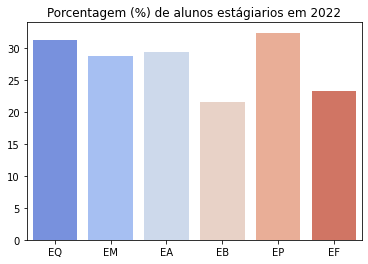

In [5]:
#Plotando o gráfico em relação aos valores acima
plt.figure()
curso = ['EQ','EM','EA','EB','EP','EF']
porcentagem = [31.3,28.7,29.4,21.5,32.4,23.3]
ax = sns.barplot(curso,porcentagem,palette = "coolwarm")
plt.title('Porcentagem (%) de alunos estágiarios em 2022')

In [ ]:
df['Empresa'].value_counts().head()